In [ ]:
import tensorflow.keras as tf
mnist = tf.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


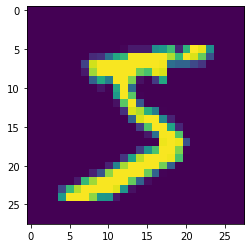

5


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

print(y_train[0])

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_train /= 255


x_test = x_test.astype('float32')
x_test /= 255


In [ ]:
print(y_train[0])

y_train = tf.utils.to_categorical(y_train, 10)
y_test = tf.utils.to_categorical(y_test, 10)

print(y_train[0])


5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
model = tf.models.Sequential()

model.add(tf.layers.Conv2D(32, kernel_size=(3, 3), activation = 'relu', input_shape =input_shape))
model.add(tf.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.layers.MaxPooling2D(pool_size = (2, 2)))
model.add(tf.layers.Dropout(0.25))
model.add(tf.layers.Flatten())
model.add(tf.layers.Dense(128, activation='relu'))
model.add(tf.layers.Dropout(0.5))
model.add(tf.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(loss=tf.losses.categorical_crossentropy, optimizer=tf.optimizers.Adadelta(), metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 155s 329ms/step - loss: 2.2776 - accuracy: 0.1736 - val_loss: 2.2369 - val_accuracy: 0.3773
Epoch 2/20
469/469 [==============================] - 154s 328ms/step - loss: 2.2111 - accuracy: 0.2936 - val_loss: 2.1548 - val_accuracy: 0.4765
Epoch 3/20
469/469 [==============================] - 154s 328ms/step - loss: 2.1239 - accuracy: 0.3865 - val_loss: 2.0429 - val_accuracy: 0.5649
Epoch 4/20
469/469 [==============================] - 151s 322ms/step - loss: 2.0094 - accuracy: 0.4640 - val_loss: 1.8967 - val_accuracy: 0.6424
Epoch 5/20
469/469 [==============================] - 150s 321ms/step - loss: 1.8622 - accuracy: 0.5225 - val_loss: 1.7144 - val_accuracy: 0.6918
Epoch 6/20
469/469 [==============================] - 151s 322ms/step - loss: 1.6926 - accuracy: 0.5685 - val_loss: 1.5101 - val_accuracy: 0.7303
Epoch 7/20
469/469 [==============================] - 150s 320ms/step - loss: 1.5184 - accuracy: 0.6046 - val_loss: 1.3082 -

In [ ]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 8s 27ms/step - loss: 0.4624 - accuracy: 0.8825
[0.46237802505493164, 0.8824999928474426]
